In [59]:
import sys
import os
import importlib
import nltk

nltk.download('punkt') # Example download

current_dir = os.path.dirname(os.path.abspath(''))
shared_path = os.path.join(current_dir, '..', 'shared')
if os.path.exists(shared_path):
    sys.path.append(shared_path)
else:
    # Fallback: try relative path
    sys.path.append('../shared')

# Force reload the module to get the latest changes
if 'NLPMethods' in sys.modules:
    importlib.reload(sys.modules['NLPMethods'])

from NLPMethods import NLPMethods

nlp_methods = NLPMethods()
clean_corpus = nlp_methods.remove_gutenberg_header("https://www.gutenberg.org/cache/epub/2500/pg2500.txt")
corpus_data = nlp_methods.get_processed_text(clean_corpus)

# print(corpus_data['quote_sentences'])
chapters = nlp_methods.get_chapters(clean_corpus)
chapters_data = nlp_methods.get_chapter_data(chapters, clean_corpus)
chapters_df = nlp_methods.chapters_to_dataframe(chapters_data)
random_sample = nlp_methods.get_random_sample_chapter_data(chapters, clean_corpus)
systematic_sample = nlp_methods.get_systematic_sample_chapter_data(chapters, clean_corpus)
print(nlp_methods.compare_sample_lengths(random_sample, systematic_sample))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marobinette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of sentences: 1857
Number of quotes found: 372
Quote sentences: 95
Non-quote sentences: 1762
Quote tokens: 0
Non-quote tokens: 39799
{'random_sample': {'count': 7, 'avg_tokens': 3004.5714285714284, 'avg_words': 2961.8571428571427, 'avg_chars': 16680.0, 'avg_sentences': 136.57142857142858}, 'systematic_sample': {'count': 8, 'avg_tokens': 3227.75, 'avg_words': 3179.5, 'avg_chars': 17862.0, 'avg_sentences': 152.0}, 'differences': {'token_diff': -223.17857142857156, 'word_diff': -217.64285714285734, 'char_diff': -1182.0, 'sentence_diff': -15.428571428571416}}


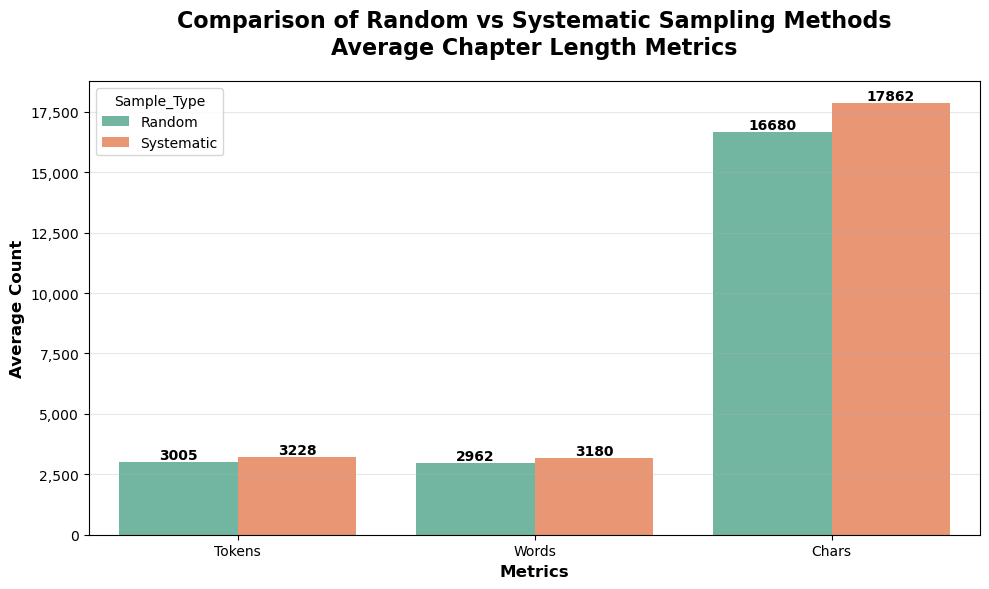


SUMMARY STATISTICS
Random Sample Count: 7 chapters
Systematic Sample Count: 8 chapters

Differences (Random - Systematic):
Tokens: -223.2
Words: -217.6
Characters: -1,182.0


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the comparison data
comparison_data = nlp_methods.compare_sample_lengths(random_sample, systematic_sample)

# Prepare data for plotting
plot_data = []

# Extract data for each metric
metrics = ['tokens', 'words', 'chars']
for metric in metrics:
    avg_key = f'avg_{metric}'
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Random',
        'Average': comparison_data['random_sample'][avg_key]
    })
    plot_data.append({
        'Metric': metric.title(),
        'Sample_Type': 'Systematic', 
        'Average': comparison_data['systematic_sample'][avg_key]
    })

df_plot = pd.DataFrame(plot_data)

plt.style.use('default')
sns.set_palette("Set2")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_plot, x='Metric', y='Average', hue='Sample_Type', ax=ax)

# Customize the plot
ax.set_title('Comparison of Random vs Systematic Sampling Methods\nAverage Chapter Length Metrics', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Count', fontsize=12, fontweight='bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, fontweight='bold')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Random Sample Count: {comparison_data['random_sample']['count']} chapters")
print(f"Systematic Sample Count: {comparison_data['systematic_sample']['count']} chapters")
print("\nDifferences (Random - Systematic):")
print(f"Tokens: {comparison_data['differences']['token_diff']:,.1f}")
print(f"Words: {comparison_data['differences']['word_diff']:,.1f}")
print(f"Characters: {comparison_data['differences']['char_diff']:,.1f}")

